# Notebok to test Pipelines

In [3]:
# Imports
import os, sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# to enable local imports
module_path = os.path.abspath(os.path.join('code'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pipelines import filter_signal, pre_process_signal, feature_extraction, convert_data
from utils import loadConfigFile
from plotFunctions import plot_magnitudeFreq_and_PSD


In [4]:
SUBJECT = 1 # Subject to use

# Import a subjectDict
from data import onlineEegDataDict as subjectDict

# Load the yaml config
yamlConfig = loadConfigFile(subjectDict[SUBJECT]["Device"])

# create a df
df = pd.read_csv(subjectDict[SUBJECT]["fatigueCsvPath"])





Loading the config file for neuroscan


In [5]:
df, featureList = convert_data(df=df, config=yamlConfig)

In [18]:
from typing import List
def saveFeatureListToFile(featureList : List, filepath : str):
    
    if type(featureList) is not list:
        raise Exception("The given feature list is not a list!")
    
    print("Saving a feature list to: '{}'".format(filepath))
    
    f = open(filepath, "w")
    for feature in featureList:
        line = "{}\n".format(feature)
        f.write(line)
    f.close()

saveFeatureListToFile(featureList, filepath="D:/Masterthesis/EEG_Data/eeg_data_online/features.txt")
    

Saving a feature list to: 'D:/Masterthesis/EEG_Data/eeg_data_online/features.txt'


In [8]:
# Filter Signal
df = filter_signal(df=df, config=yamlConfig)

In [9]:
df

,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,channel_9,channel_10,...,channel_31,channel_32,channel_33,channel_34,channel_35,channel_36,channel_37,channel_38,channel_39,channel_40
0,NaN,0.0,NaN,NaN,NaN,-30.760874,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,NaN,0.0,NaN,NaN,NaN,-193.135778,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76907,14.768755,0.0,-9.917339,-3.649919,-17.214112,39.866163,-2.443935,-4.127272,-3.046875,-11.575279,...,-2.513992,4.944051,0.0,9.972943,7.609567,6.341200,0.0,0.0,0.0,0.0
76908,14.758983,0.0,-11.842658,8.759467,-31.382482,37.110731,-0.620261,-0.002205,1.341173,-2.885153,...,-0.791868,3.743805,0.0,7.318816,6.619438,6.857063,0.0,0.0,0.0,0.0
76909,13.545756,0.0,-24.066705,4.760604,-43.475204,32.918856,-1.792543,5.495682,7.648088,9.012708,...,0.628683,-2.840457,0.0,14.496612,2.966457,3.576905,0.0,0.0,0.0,0.0
76910,11.311413,0.0,-26.273235,-16.546949,-34.441364,29.489897,-3.004645,7.815722,9.636847,11.991953,...,2.250342,-7.883670,0.0,19.791316,1.744069,1.194425,0.0,0.0,0.0,0.0


In [10]:
df_series = pre_process_signal(df=df, config=yamlConfig)

Creating sliding windows...
Converting 3d Numpy Array to a series of Df's
Normalizing data...
Deleting Nan's...


0           channel_1  channel_2  channel_3  channel_...
1           channel_1  channel_2  channel_3  channel_...
2           channel_1  channel_2  channel_3  channel_...
3           channel_1  channel_2   channel_3   channe...
4           channel_1  channel_2  channel_3  channel_...
                             ...                        
294         channel_1  channel_2  channel_3  channel_...
295         channel_1  channel_2  channel_3  channel_...
296         channel_1  channel_2  channel_3  channel_...
297         channel_1  channel_2  channel_3  channel_...
298         channel_1  channel_2  channel_3  channel_...
Length: 299, dtype: object

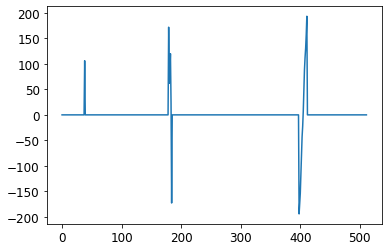

In [7]:
df_series[0].channel_1.plot()

In [11]:
feature_df = feature_extraction(epochSeries=df_series, config=yamlConfig)

Frequenccy Bands: [(0.5, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta'), (30, 50, 'Gamma')]


C:\Users\reiss\Anaconda3\envs\ml\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 512, using nperseg = 512
  .format(nperseg, input_length))
C:\Users\reiss\Anaconda3\envs\ml\lib\site-packages\yasa\spectral.py:237: RuntimeWarning: invalid value encountered in true_divide
  bp /= total_power


Creating bandpower, lower & upper envelope dictionary...


D:\Masterthesis\thesis_eeg\code\Transformer_Feature_Extraction.py:184: RuntimeWarning: invalid value encountered in sign
  if (np.sign(aTimeSeries[k]-aTimeSeries[k-1])==1) and (np.sign(aTimeSeries[k]-aTimeSeries[k+1])==1) and ((k-lastPeak)>rejectCloserThan):
D:\Masterthesis\thesis_eeg\code\Transformer_Feature_Extraction.py:190: RuntimeWarning: invalid value encountered in sign
  if (np.sign(aTimeSeries[k]-aTimeSeries[k-1])==-1) and ((np.sign(aTimeSeries[k]-aTimeSeries[k+1]))==-1) and ((k-lastTrough)>rejectCloserThan):


Creating statistics bandpower dict...
Creating a nice feature dataframe...


In [8]:
feature_df.head()

,channel_1_Delta_mean_bandpower_list,channel_1_Delta_mean_bandpower_lower_envelope_list,channel_1_Delta_mean_bandpower_upper_envelope_list,channel_1_Delta_std_dev_bandpower_list,channel_1_Delta_std_dev_bandpower_lower_envelope_list,channel_1_Delta_std_dev_bandpower_upper_envelope_list,channel_1_Theta_mean_bandpower_list,channel_1_Theta_mean_bandpower_lower_envelope_list,channel_1_Theta_mean_bandpower_upper_envelope_list,channel_1_Theta_std_dev_bandpower_list,...,channel_40_Beta_mean_bandpower_upper_envelope_list,channel_40_Beta_std_dev_bandpower_list,channel_40_Beta_std_dev_bandpower_lower_envelope_list,channel_40_Beta_std_dev_bandpower_upper_envelope_list,channel_40_Gamma_mean_bandpower_list,channel_40_Gamma_mean_bandpower_lower_envelope_list,channel_40_Gamma_mean_bandpower_upper_envelope_list,channel_40_Gamma_std_dev_bandpower_list,channel_40_Gamma_std_dev_bandpower_lower_envelope_list,channel_40_Gamma_std_dev_bandpower_upper_envelope_list
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,None,NaN,None,None,NaN,None,None
1,0.695273,NaN,NaN,0.178725,NaN,NaN,0.048328,NaN,NaN,0.037045,...,None,NaN,None,None,NaN,None,None,NaN,None,None
2,0.636144,NaN,NaN,0.064849,NaN,NaN,0.069679,NaN,NaN,0.036242,...,None,NaN,None,None,NaN,None,None,NaN,None,None
3,0.340174,NaN,NaN,0.147092,NaN,NaN,0.076004,NaN,NaN,0.031456,...,None,NaN,None,None,NaN,None,None,NaN,None,None
4,0.365114,NaN,NaN,0.166344,NaN,NaN,0.076706,NaN,NaN,0.052933,...,None,NaN,None,None,NaN,None,None,NaN,None,None


In [9]:
def convertFeatureDfToXy(featureDf : pd.DataFrame, target : int) -> (np.ndarray, np.ndarray):
    samples = []
    targetArray = []
    
    for index, row in featureDf.iterrows():
        timesteps = []
        features = row.to_numpy() # features
        timesteps.append(features)
        samples.append(timesteps)
        
        targetArray.append(target)
    
    X = np.array(samples)
    y = np.array(targetArray)
    
    return X, y 
    

def createDatasetXy(dataSeries : pd.Series, target : int) -> (np.ndarray, np.ndarray):
    ''' Create X and y for machine learning
    
    @param pd.Series dataSeries: Should be a series of dataframes
    
    X should look like this [samples, timesteps, features]
        samples: The epoch
        timesteps: E.g. if the epoch contains 200 values then the timestep should contain 200 values
        features: The actual value
    
    y should look tlike this [classIds] 
        classIds: The label for the sample of the X Data
    '''
    
    samples = []
    targetArray = []
    
    if type(dataSeries) != pd.Series:
        raise Exception("The given dataSeries is not a pd.Series! It is {}".format(type(dataSeries)))
    
    # loop through the data Series
    for df in dataSeries:
        
        if type(df) != pd.DataFrame: # check the type
            raise Exception("The dataseries contains a {} object - The series should dataframes only!".format(type(df)))
            
        timesteps = []
            
        for index, row in df.iterrows():
            features = row.to_numpy() # features
            timesteps.append(features)
        
        samples.append(timesteps)
        targetArray.append(target)
    
    
    X = np.array(samples)
    y = np.array(targetArray)
    
    return X, y

#createDatasetXy(dataSeries)

In [23]:
X, y = createDatasetXy(df_series, target=0)

In [24]:
X.shape

(299, 512, 40)

0.5409918107281121